<a href="https://colab.research.google.com/github/thuc-github/MIS710-T12023/blob/main/A1/MIS710%20A1%20Template%20T1%202023.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# MIS710 Machine Learning in Business - Assignment 1

**Student Name:** _enter your full name here_

**Student ID:** _enter your student ID here_

<a id = "cell_executivesummary"></a>
## 1. Business understandings, problem, solution and recommendations

Business Understanding and Problem: Play Quest Conquer (PQC) seeks to understand the factors influencing game ratings to inform game development, acquisition, and promotion strategies. The primary business problem is identifying which features, such as game complexity, interest levels, and player engagement, most significantly impact ratings.

Aim: The aim of this project is to develop a predictive model that accurately estimates game ratings based on these features, providing actionable insights to optimize PQC’s game portfolio and enhance user satisfaction.

Solution: A multiple linear regression model was developed to identify key predictors of game ratings. Despite explaining only a portion of the variance, the model highlights significant factors like Average_Complexity and Game_Type.

Recommendations: To improve predictive accuracy, consider enhancing the model with interaction terms and exploring non-linear relationships. Regularly update the model with new data to adapt to changing player preferences and ensure continued relevance in decision-making.

<a id = "cell_exploration"></a>
## 2. Data understanding, preparation, explorations and visualisation



In [ ]:
# Load requires libraries
import pandas as pd #for data manipulation and analysis
import numpy as np #for working with arrays

#import data visualisation libraries
import matplotlib.pyplot as plt
import seaborn as sns
# Load data from CloudDeakin


2.1 Load dataset*

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
# load dataset stored in Google drive
dataset = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/MIS710 ASM 1/PQC_data (3).csv")

2.2 General Information and Game Configuration

In [ ]:
#Display info of the dataset
print(dataset.info())
#View the dataframe shape
print("\n* Dataset shape: ", dataset.shape)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 24813 entries, 0 to 24812
Data columns (total 17 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Game_ID              24813 non-null  int64  
 1   Game_Name            24806 non-null  object 
 2   Released_Year        24813 non-null  int64  
 3   Game_Type            24813 non-null  object 
 4   Age_Category         24813 non-null  object 
 5   Min_Players          24813 non-null  int64  
 6   Max_Players          24813 non-null  int64  
 7   Average_Complexity   24813 non-null  float64
 8   Complexity_Raters    24813 non-null  int64  
 9   Average_Play_Time    24813 non-null  int64  
 10  Owner_Number         24813 non-null  int64  
 11  Trader_Number        24813 non-null  int64  
 12  HighInterest_Number  24813 non-null  int64  
 13  Interest_Number      24813 non-null  int64  
 14  Rater_Number         24813 non-null  int64  
 15  Comment_Number       24813 non-null 

In [ ]:
print("General Information and Game Configuration:")

# Game types
if 'Game_Type' in dataset.columns: # Use 'dataset' instead of 'data'
    game_types = dataset['Game_Type'].value_counts()
    print("\nGame Types:\n", game_types)
else:
    print("\n'Game_Type' column not found in the dataset.")

# Year of release
if 'Released_Year' in dataset.columns: # Use 'dataset' instead of 'data'
    years = dataset['Released_Year'].value_counts().sort_index()
    print("\nYear of Release (Categorized):\n", years)
else:
    print("\n'Released_year' column not found in the dataset.")

# Age category
if 'Age_Category' in dataset.columns: # Use 'dataset' instead of 'data'
    age_categories = dataset['Age_Category'].value_counts()
    print("\nAge Category:\n", age_categories)
else:
    print("\n'Age_Category' column not found in the dataset.")

# Minimum number of players
if 'Min_Players' in dataset.columns: # Use 'dataset' instead of 'data'
    min_players = dataset['Min_Players'].value_counts().sort_index()
    print("\nMinimum Number of Players Required:\n", min_players)
else:
    print("\n'Min_Players' column not found in the dataset.")

# Maximum number of players
if 'Max_Players' in dataset.columns: # Use 'dataset' instead of 'data'
    max_players = dataset['Max_Players'].value_counts().sort_index()
    print("\nMaximum Number of Players Allowed:\n", max_players)
else:
    print("\n'Max_Players' column not found in the dataset.")

# Average complexity
if 'Average_Complexity' in dataset.columns:
    avg_complexity = dataset['Average_Complexity'].describe()
    print("\nAverage Complexity:\n", avg_complexity)
else:
    print("\n'Average_Complexity' column not found in the dataset.")

# Complexity raters
if 'Complexity_Raters' in dataset.columns:
    complexity_raters = dataset['Complexity_Raters'].describe()
    print("\nComplexity Raters:\n", complexity_raters)
else:
    print("\n'Complexity_Raters' column not found in the dataset.")

# Average play time
if 'Average_Play_Time' in dataset.columns:
    avg_play_time = dataset['Average_Play_Time'].describe()
    print("\nAverage Play Time:\n", avg_play_time)
else:
    print("\n'Average_Play_Time' column not found in the dataset.")

# Owner number
if 'Owner_Number' in dataset.columns:
    owner_number = dataset['Owner_Number'].describe()
    print("\nOwner Number:\n", owner_number)
else:
    print("\n'Owner_Number' column not found in the dataset.")

# Trader number
if 'Trader_Number' in dataset.columns:
    trader_number = dataset['Trader_Number'].describe()
    print("\nTrader Number:\n", trader_number)
else:
    print("\n'Trader_Number' column not found in the dataset.")

# High interest number
if 'HighInterest_Number' in dataset.columns:
    high_interest_number = dataset['HighInterest_Number'].describe()
    print("\nHigh Interest Number:\n", high_interest_number)
else:
    print("\n'HighInterest_Number' column not found in the dataset.")

# Interest number
if 'Interest_Number' in dataset.columns:
    interest_number = dataset['Interest_Number'].describe()
    print("\nInterest Number:\n", interest_number)
else:
    print("\n'Interest_Number' column not found in the dataset.")

# Average rating
if 'Average_Rating' in dataset.columns:
    avg_rating = dataset['Average_Rating'].describe()
    print("\nAverage Rating:\n", avg_rating)
else:
    print("\n'Average_Rating' column not found in the dataset.")

# Rater number
if 'Rater_Number' in dataset.columns:
    rater_number = dataset['Rater_Number'].describe()
    print("\nRater Number:\n", rater_number)
else:
    print("\n'Rater_Number' column not found in the dataset.")

# Comment number
if 'Comment_Number' in dataset.columns:
    comment_number = dataset['Comment_Number'].describe()
    print("\nComment Number:\n", comment_number)
else:
    print("\n'Comment_Number' column not found in the dataset.")

General Information and Game Configuration:

Game Types:
 Game_Type
BaseGame       20796
PremiumGame     4017
Name: count, dtype: int64

Year of Release (Categorized):
 Released_Year
-99        89
 1980     185
 1981     224
 1982     218
 1983     228
 1984     212
 1985     262
 1986     261
 1987     268
 1988     247
 1989     250
 1990     254
 1991     282
 1992     302
 1993     288
 1994     287
 1995     363
 1996     332
 1997     377
 1998     453
 1999     447
 2000     537
 2001     546
 2002     644
 2003     806
 2004     914
 2005    1071
 2006    1049
 2007    1166
 2008    1274
 2009    1418
 2010    1484
 2011    1568
 2012    1622
 2013    1740
 2014    1941
 2015    1129
 2016      73
 2017       2
Name: count, dtype: int64

Age Category:
 Age_Category
5 to under 12     12335
12 to under 18     8520
under 5            3751
18 to under 21      183
21 and over          24
Name: count, dtype: int64

Minimum Number of Players Required:
 Min_Players
0       47
1     301

In [ ]:
#overview of numeric data
dataset.describe()

,Game_ID,Released_Year,Min_Players,Max_Players,Average_Complexity,Complexity_Raters,Average_Play_Time,Owner_Number,Trader_Number,HighInterest_Number,Interest_Number,Rater_Number,Comment_Number,Average_Rating
count,24813.00,24813.00,24813.00,24813.00,24813.00,24813.00,24813.00,24813.00,24813.00,24813.00,24813.00,24813.00,24813.00,24813.00
mean,30936.02,1997.20,2.06,5.32,1.99,42.55,55.21,674.20,23.19,32.46,111.18,426.81,125.99,6.21
std,18959.06,126.09,0.67,7.08,0.83,190.11,42.59,2453.51,61.47,95.83,378.75,1881.19,457.63,1.51
min,7074.00,-99.00,0.00,0.00,1.00,1.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
25%,14652.00,2000.00,2.00,4.00,1.23,1.00,25.00,17.00,0.00,0.00,2.00,7.00,4.00,5.56
50%,24721.00,2007.00,2.00,4.00,2.00,4.00,45.00,77.00,3.00,3.00,9.00,27.00,13.00,6.43
75%,47162.00,2012.00,2.00,6.00,2.50,16.00,60.00,376.00,17.00,18.00,49.00,142.00,57.00,7.15
max,71822.00,2017.00,9.00,99.00,5.00,5996.00,180.00,73188.00,1395.00,1586.00,6402.00,53680.00,11798.00,10.00


In [ ]:
#set the formatting for floating numbers
pd.set_option('display.float_format', lambda x: '%.2f' % x)

data_types =['object', 'float', 'int']
dataset.describe(include=data_types)

,Game_ID,Game_Name,Released_Year,Game_Type,Age_Category,Min_Players,Max_Players,Average_Complexity,Complexity_Raters,Average_Play_Time,Owner_Number,Trader_Number,HighInterest_Number,Interest_Number,Rater_Number,Comment_Number,Average_Rating
count,24813.00,24806,24813.00,24813,24813,24813.00,24813.00,24813.00,24813.00,24813.00,24813.00,24813.00,24813.00,24813.00,24813.00,24813.00,24813.00
unique,NaN,23079,NaN,2,5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,Cosmic Encounter,NaN,BaseGame,5 to under 12,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,6,NaN,20796,12335,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,30936.02,NaN,1997.20,NaN,NaN,2.06,5.32,1.99,42.55,55.21,674.20,23.19,32.46,111.18,426.81,125.99,6.21
std,18959.06,NaN,126.09,NaN,NaN,0.67,7.08,0.83,190.11,42.59,2453.51,61.47,95.83,378.75,1881.19,457.63,1.51
min,7074.00,NaN,-99.00,NaN,NaN,0.00,0.00,1.00,1.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
25%,14652.00,NaN,2000.00,NaN,NaN,2.00,4.00,1.23,1.00,25.00,17.00,0.00,0.00,2.00,7.00,4.00,5.56
50%,24721.00,NaN,2007.00,NaN,NaN,2.00,4.00,2.00,4.00,45.00,77.00,3.00,3.00,9.00,27.00,13.00,6.43
75%,47162.00,NaN,2012.00,NaN,NaN,2.00,6.00,2.50,16.00,60.00,376.00,17.00,18.00,49.00,142.00,57.00,7.15



# 3. Conduct Exploratory Data Analysis (EDA)


3.1 Univariate analysis

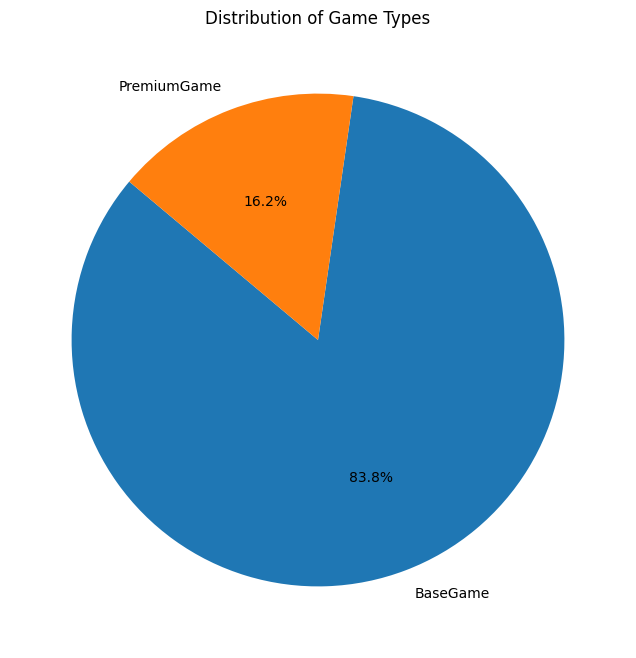

<ipython-input-334-ff2ab230c733>:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=years.index, y=years.values, palette='viridis')


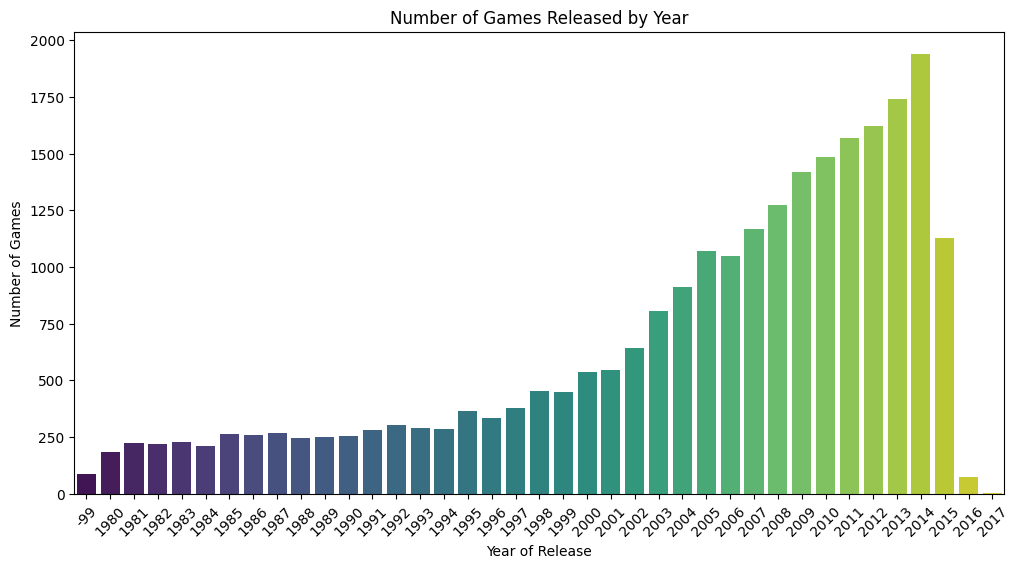

<ipython-input-334-ff2ab230c733>:21: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=age_categories.index, y=age_categories.values, palette='muted')


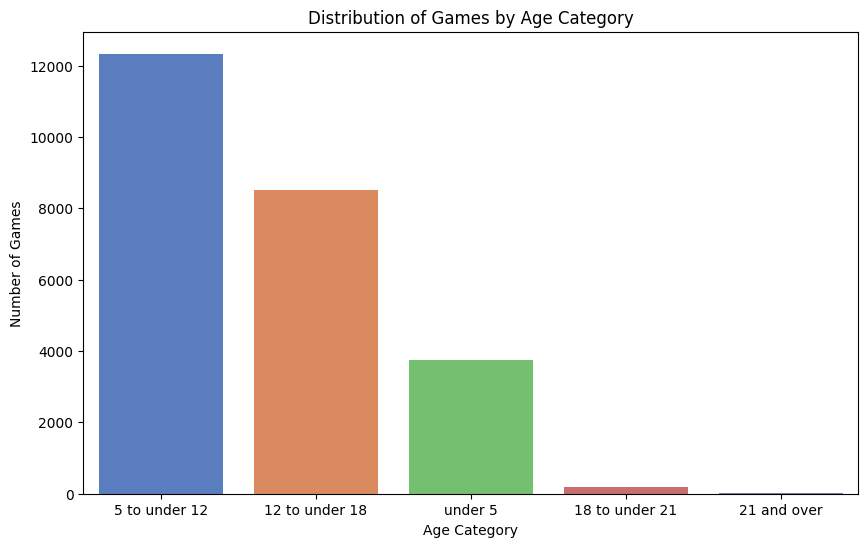

<ipython-input-334-ff2ab230c733>:30: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=min_players.index, y=min_players.values, palette='deep')


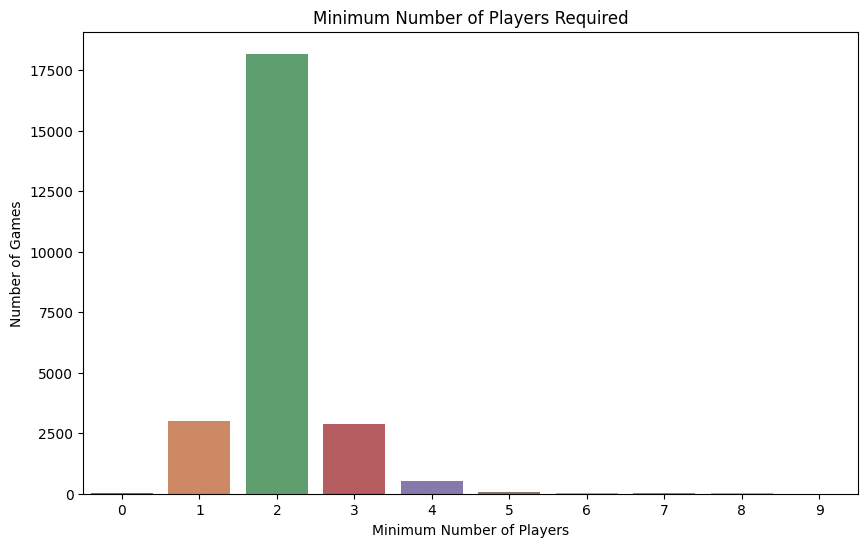

<ipython-input-334-ff2ab230c733>:39: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=max_players.index, y=max_players.values, palette='dark')


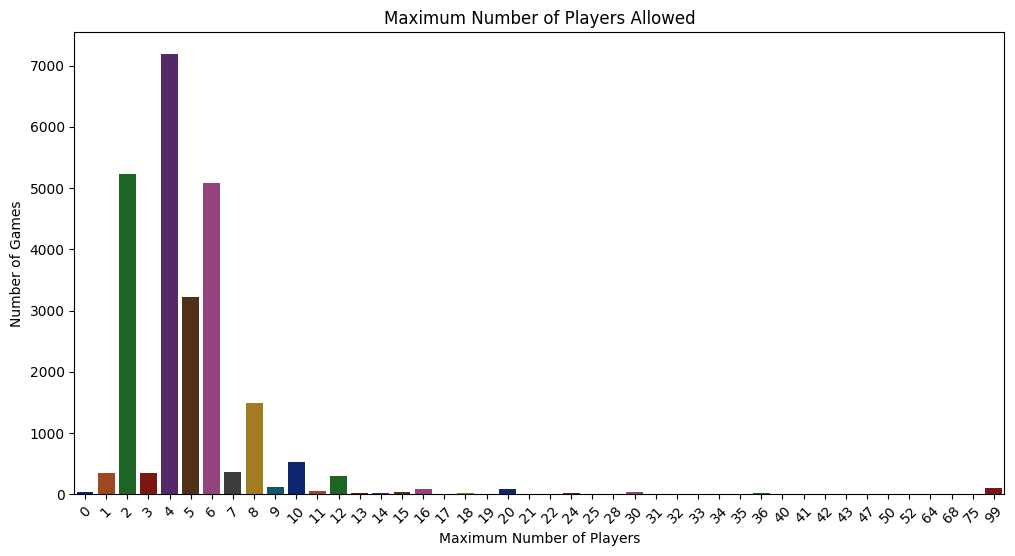

In [ ]:
# 1. Game Types - Pie Chart
plt.figure(figsize=(8, 8))
game_types = dataset['Game_Type'].value_counts()
plt.pie(game_types, labels=game_types.index, autopct='%1.1f%%', startangle=140)
plt.title('Distribution of Game Types')
plt.show()

# 2. Year of Release - Bar Plot
plt.figure(figsize=(12, 6))
years = dataset['Released_Year'].value_counts().sort_index()
sns.barplot(x=years.index, y=years.values, palette='viridis')
plt.title('Number of Games Released by Year')
plt.xlabel('Year of Release')
plt.ylabel('Number of Games')
plt.xticks(rotation=45)
plt.show()

# 3. Age Category - Bar Plot
plt.figure(figsize=(10, 6))
age_categories = dataset['Age_Category'].value_counts()
sns.barplot(x=age_categories.index, y=age_categories.values, palette='muted')
plt.title('Distribution of Games by Age Category')
plt.xlabel('Age Category')
plt.ylabel('Number of Games')
plt.show()

# 4. Minimum Number of Players - Bar Plot
plt.figure(figsize=(10, 6))
min_players = dataset['Min_Players'].value_counts().sort_index()
sns.barplot(x=min_players.index, y=min_players.values, palette='deep')
plt.title('Minimum Number of Players Required')
plt.xlabel('Minimum Number of Players')
plt.ylabel('Number of Games')
plt.show()

# 5. Maximum Number of Players - Bar Plot
plt.figure(figsize=(12, 6))
max_players = dataset['Max_Players'].value_counts().sort_index()
sns.barplot(x=max_players.index, y=max_players.values, palette='dark')
plt.title('Maximum Number of Players Allowed')
plt.xlabel('Maximum Number of Players')
plt.ylabel('Number of Games')
plt.xticks(rotation=45)
plt.show()



3.2 Game engagement: Summarise the average play time? Are there outliers?

count   24813.00
mean       55.21
std        42.59
min         1.00
25%        25.00
50%        45.00
75%        60.00
max       180.00
Name: Average_Play_Time, dtype: float64


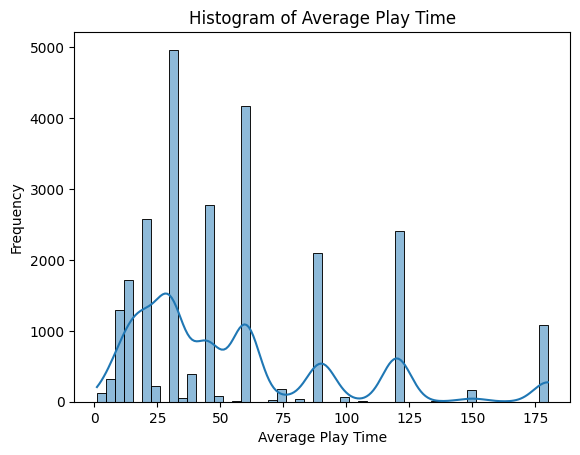

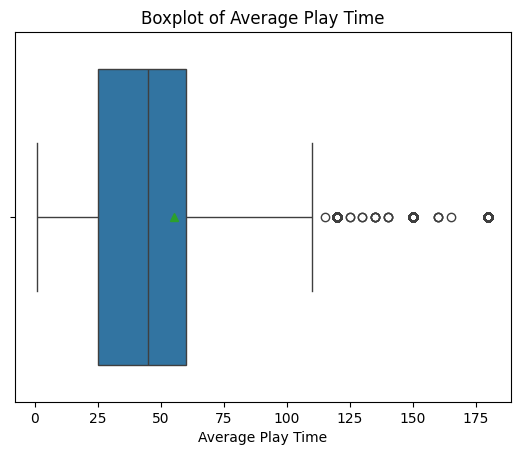

In [ ]:
# Describe the 'Average_Play_Time' column
print(dataset['Average_Play_Time'].describe())

# Visualize the distribution of 'Average_Rating'
sns.histplot(data=dataset, x='Average_Play_Time', kde=True, bins=50)
plt.title('Histogram of Average Play Time')
plt.xlabel('Average Play Time')
plt.ylabel('Frequency')
plt.show()
#Visualise the distribution by box plot
sns.boxplot(data=dataset, x='Average_Play_Time', showmeans=True)
plt.title('Boxplot of Average Play Time')
plt.xlabel('Average Play Time')
plt.show()

3.3 Game engagement and rating: Is there a relationship between the playing time and the average ratings?

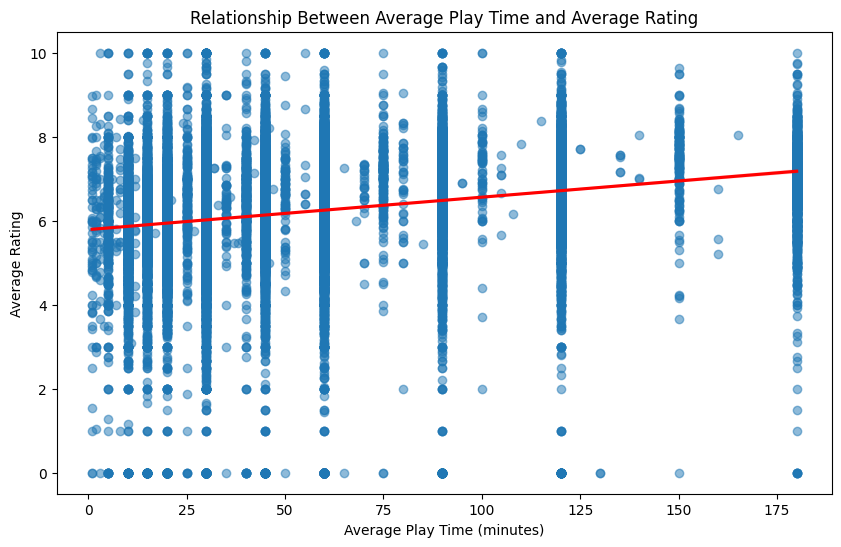

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set the figure size
plt.figure(figsize=(10, 6))

# Create a scatter plot with a regression line
sns.regplot(data=dataset, x='Average_Play_Time', y='Average_Rating', scatter_kws={'alpha':0.5}, line_kws={'color':'red'})

# Add labels and title
plt.xlabel('Average Play Time (minutes)')
plt.ylabel('Average Rating')
plt.title('Relationship Between Average Play Time and Average Rating')

# Show the plot
plt.show()

3.4 Game complexity and rating


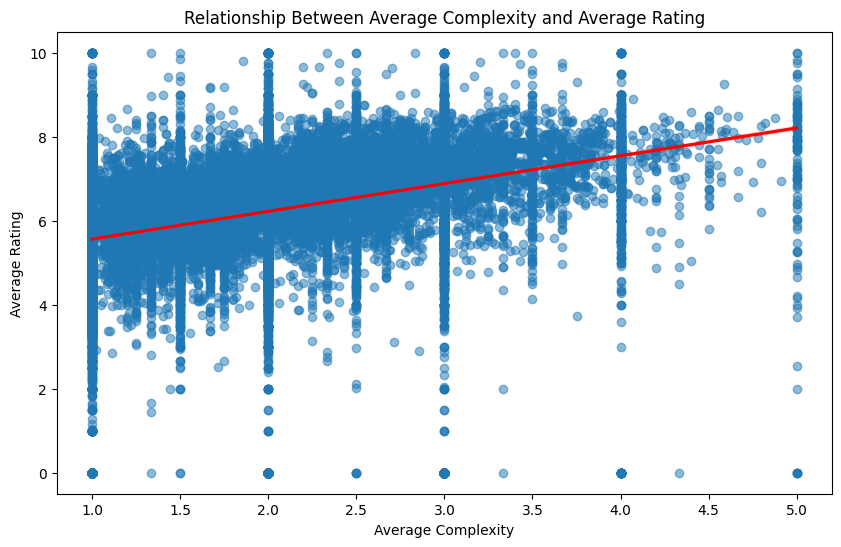

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set the figure size
plt.figure(figsize=(10, 6))

# Create a scatter plot with a regression line
sns.regplot(data=dataset, x='Average_Complexity', y='Average_Rating', scatter_kws={'alpha':0.5}, line_kws={'color':'red'})

# Add labels and title
plt.xlabel('Average Complexity')
plt.ylabel('Average Rating')
plt.title('Relationship Between Average Complexity and Average Rating')

# Show the plot
plt.show()

3.5 Correlation matrix between variables

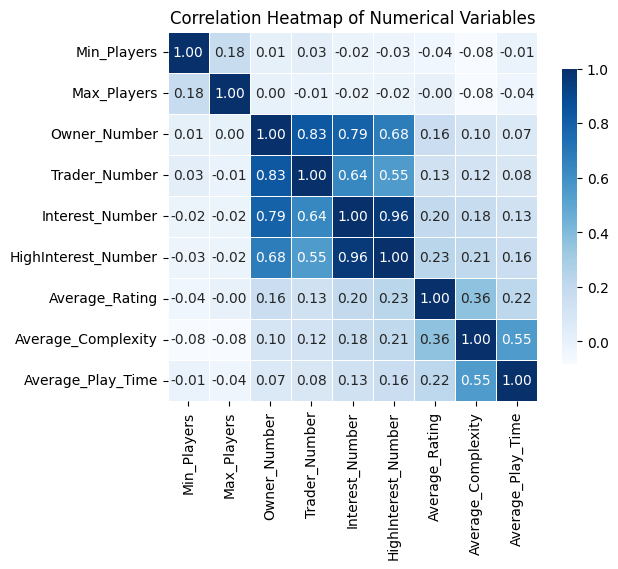

<Figure size 2400x1400 with 0 Axes>

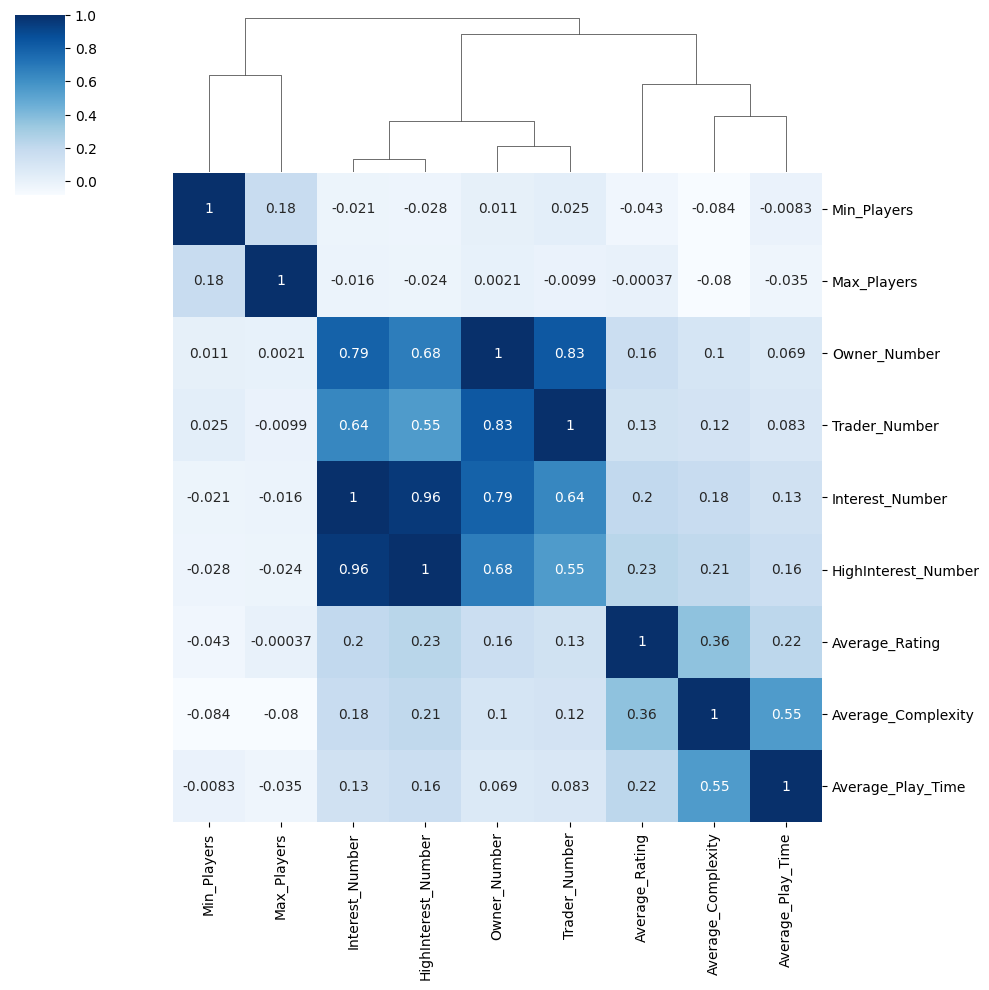

In [ ]:
# Calculate the correlation matrix
numerical_variables  = ['Min_Players', 'Max_Players', 'Owner_Number', 'Trader_Number', 'Interest_Number', 'HighInterest_Number', 'Average_Rating', 'Average_Complexity','Average_Play_Time']
correlation_matrix = dataset[numerical_variables].corr()

# Generate the heatmap
sns.heatmap(correlation_matrix,
            square=True,
            cmap='Blues',
            annot=True,  fmt='.2f',  # Format for annotation text
            linewidths=0.5,  # Add lines between cells
            cbar_kws={'shrink': .8})  # Adjust colorbar size
plt.title('Correlation Heatmap of Numerical Variables')
plt.figure(figsize=(24,14))
#generate dendrograms to show hierarchical clustering
sns.clustermap(dataset[numerical_variables].corr(), cmap='Blues', annot=True, row_cluster=False)
plt.show()

# 4. Data Cleaning and Building a Machine Learning Model

4.1 Inspect missing data

In [ ]:
#Count missing data
print(dataset.isnull().sum().sort_values(ascending=0))

Game_Name              7
Game_ID                0
Average_Play_Time      0
Comment_Number         0
Rater_Number           0
Interest_Number        0
HighInterest_Number    0
Trader_Number          0
Owner_Number           0
Complexity_Raters      0
Average_Complexity     0
Max_Players            0
Min_Players            0
Age_Category           0
Game_Type              0
Released_Year          0
Average_Rating         0
dtype: int64


In [ ]:
#Few missign data can be dropped
dataset = dataset.dropna()

4.2 Encoding Categorical Variables

In [ ]:
print(dataset.columns)

Index(['Game_ID', 'Game_Name', 'Released_Year', 'Game_Type', 'Age_Category',
       'Min_Players', 'Max_Players', 'Average_Complexity', 'Complexity_Raters',
       'Average_Play_Time', 'Owner_Number', 'Trader_Number',
       'HighInterest_Number', 'Interest_Number', 'Rater_Number',
       'Comment_Number', 'Average_Rating'],
      dtype='object')


In [ ]:
from sklearn.preprocessing import LabelEncoder

# Initialize the LabelEncoder
encoder = LabelEncoder()

# Encode 'Game_Type'
dataset['Game_Type_Numeric'] = encoder.fit_transform(dataset['Game_Type'])

# Encode 'Age_Category'
dataset['Age_Category_Numeric'] = encoder.fit_transform(dataset['Age_Category'])

# If you have another ordinal category like 'Year_Category':
dataset['Year_Category_Numeric'] = encoder.fit_transform(dataset['Released_Year'])

# Display the first few rows to check the encoding
print(dataset[['Game_Type', 'Game_Type_Numeric', 'Age_Category', 'Age_Category_Numeric', 'Released_Year', 'Year_Category_Numeric']].head(20))


   Game_Type  Game_Type_Numeric    Age_Category  Age_Category_Numeric  \
0   BaseGame                  0  12 to under 18                     0   
1   BaseGame                  0         under 5                     4   
2   BaseGame                  0   5 to under 12                     3   
3   BaseGame                  0  12 to under 18                     0   
4   BaseGame                  0  12 to under 18                     0   
5   BaseGame                  0         under 5                     4   
6   BaseGame                  0   5 to under 12                     3   
7   BaseGame                  0         under 5                     4   
8   BaseGame                  0  12 to under 18                     0   
9   BaseGame                  0   5 to under 12                     3   
10  BaseGame                  0   5 to under 12                     3   
11  BaseGame                  0  12 to under 18                     0   
12  BaseGame                  0  18 to under 21    

<ipython-input-342-789a5bfebade>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataset['Game_Type_Numeric'] = encoder.fit_transform(dataset['Game_Type'])
<ipython-input-342-789a5bfebade>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataset['Age_Category_Numeric'] = encoder.fit_transform(dataset['Age_Category'])
<ipython-input-342-789a5bfebade>:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See t

4.3 Select features and target

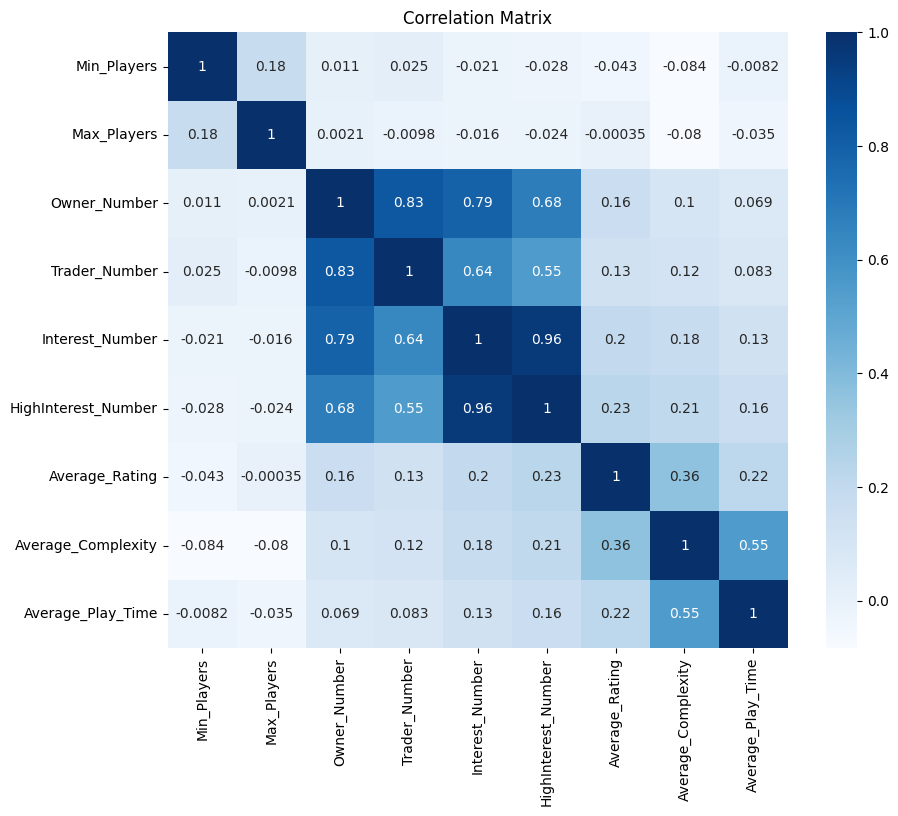

In [ ]:
#Use heatmap to select features with high correlation to label
plt.figure(figsize=(10, 8))
sns.heatmap(dataset[numerical_variables].corr(), annot=True, cmap='Blues')
plt.title("Correlation Matrix")
plt.show()

In [ ]:

#feature selection
features = ['Average_Complexity', 'HighInterest_Number', 'Average_Play_Time', 'Game_Type_Numeric', 'Age_Category_Numeric']
X = dataset[features]
X.head()

,Average_Complexity,HighInterest_Number,Average_Play_Time,Game_Type_Numeric,Age_Category_Numeric
0,3.36,293,120,0,0
1,2.00,1,60,0,4
2,2.00,20,10,0,3
3,2.40,36,75,0,0
4,3.00,1,120,0,0


In [ ]:
#specify the label
y=dataset['Average_Rating']
y.head()

,Average_Rating
0,7.52
1,7.50
2,6.49
3,7.66
4,7.50


4.4 Splitting Data

In [ ]:
# Split dataset into training set 80% and test set 20%
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

#inspect the split datasets
print(X_train.head())
print(y_train.head())

print('Training dataset size:',X_train.shape)
print('Test dataset size:',X_test.shape)

       Average_Complexity  HighInterest_Number  Average_Play_Time  \
22404                1.00                    0                 15   
3265                 1.00                    0                 45   
15410                2.00                    0                 35   
22112                2.00                    0                 20   
19057                2.00                    6                 30   

       Game_Type_Numeric  Age_Category_Numeric  
22404                  0                     0  
3265                   0                     3  
15410                  0                     0  
22112                  0                     3  
19057                  0                     3  
22404   6.14
3265    6.26
15410   6.50
22112   5.50
19057   5.54
Name: Average_Rating, dtype: float64
Training dataset size: (19844, 5)
Test dataset size: (4962, 5)


4.5 Training a Multiple Linear Model

In [ ]:
#import linear_model
from sklearn import linear_model

#create a linear_model object

reg = linear_model.LinearRegression()

In [ ]:
#Train a Multiple Linear Regression model (regressor) with the training dataset
reg=reg.fit(X_train, y_train)

4.6 Make prediction

In [ ]:
y_pred = reg.predict(X_test)

4.7 Inspect the predictions and the original labels

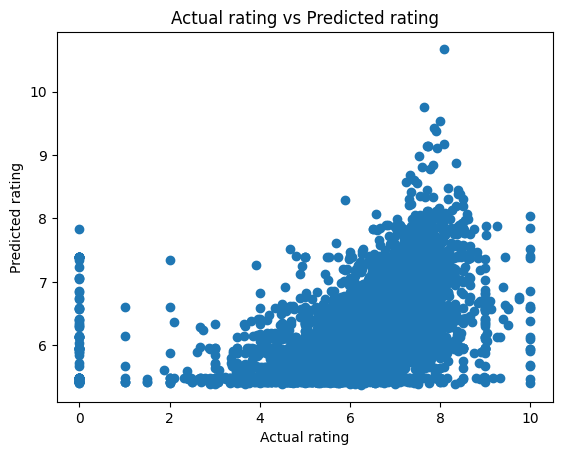

In [ ]:
plt.scatter(y_test, y_pred)
plt.xlabel("Actual rating")
plt.ylabel("Predicted rating")
plt.title("Actual rating vs Predicted rating")
plt.show()

In [ ]:
# Set the formatting for floating-point numbers
pd.set_option('display.float_format', lambda x: '%.2f' % x)
# Extract the specified features from X_test
selected_features = X_test[features].copy()
# Create a DataFrame for inspection
inspection = selected_features.copy()  # Make a copy of selected features DataFrame
inspection['Actual'] = y_test  # Add the actual target values
inspection['Predicted'] = y_pred  # Add the predicted target values

# Display the first 20 rows of the inspection DataFrame
print(inspection.head(20))

       Average_Complexity  HighInterest_Number  Average_Play_Time  \
4973                 3.00                    5                 90   
2442                 2.50                   19                120   
24724                1.21                  130                 45   
23669                1.00                    0                 20   
10920                2.79                  120                 45   
1661                 2.31                   13                 60   
15757                3.00                    0                 60   
23548                2.28                  335                 40   
10633                2.00                    0                 60   
22250                2.00                    0                 10   
3342                 2.00                    0                 30   
6216                 3.00                    0                 30   
1972                 2.15                   16                 30   
15046                2.25         

4.8 Performance evaluation

In [ ]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np

# Calculate R-squared
r_squared = r2_score(y_test, y_pred)
print(f"R-squared: {r_squared:.2f}")

# Calculate Mean Absolute Error (MAE)
mae = mean_absolute_error(y_test, y_pred)
print(f"Mean Absolute Error (MAE): {mae:.2f}")

# Calculate Mean Squared Error (MSE)
mse = mean_squared_error(y_test, y_pred)
print(f"Mean Squared Error (MSE): {mse:.2f}")

# Calculate Root Mean Squared Error (RMSE)
rmse = np.sqrt(mse)
print(f"Root Mean Squared Error (RMSE): {rmse:.2f}")


R-squared: 0.20
Mean Absolute Error (MAE): 0.86
Mean Squared Error (MSE): 1.73
Root Mean Squared Error (RMSE): 1.32


In [ ]:
#Examine the performance using the descriptive stats of price
inspection['Actual'].describe()

,Actual
count,4962.00
mean,6.25
std,1.47
min,0.00
25%,5.59
50%,6.44
75%,7.15
max,10.00


In [ ]:
#Examine the descriptive stats of predicted price
inspection['Predicted'].describe()

,Predicted
count,4962.00
mean,6.21
std,0.67
min,5.37
25%,5.67
50%,6.05
75%,6.61
max,10.67


4.9 Data features and their coefficients

In [ ]:

# Print the features and their coefficients
for feature, coef in zip(features, reg.coef_):
    print(f'{feature}: {coef:.2f}')

Average_Complexity: 0.47
HighInterest_Number: 0.00
Average_Play_Time: -0.00
Game_Type_Numeric: 0.80
Age_Category_Numeric: -0.06


In [ ]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [ ]:
# Ensure all data in X is numeric
X = X.apply(pd.to_numeric, errors='coerce')
# Convert boolean columns to integers
for col in X.columns:
    if X[col].dtype == 'bool':
        X[col] = X[col].astype(int)

4.10 VIF caculation

In [ ]:

# Add intercept for VIF calculation
X_vif = X.copy()
X_vif['intercept'] = 1

# Calculate VIF for each feature
vif_data = pd.DataFrame()
vif_data["variables"] = X_vif.columns
vif_data["VIF"] = [variance_inflation_factor(X_vif.values, i) for i in range(X_vif.shape[1])]

# Print VIFs to two decimal places
for index, row in vif_data.iterrows():
    print(f'{row["variables"]}: {row["VIF"]:.2f}')

Average_Complexity: 1.58
HighInterest_Number: 1.06
Average_Play_Time: 1.51
Game_Type_Numeric: 1.10
Age_Category_Numeric: 1.23
intercept: 12.77


In [ ]:
# prompt: calculate 95CI for the y_pred, upper and lower bound

import numpy as np
from scipy import stats

# Calculate the standard error of the prediction
std_error = np.sqrt(np.mean((y_pred - y_test)**2))

# Calculate the critical value for a 95% confidence interval
z_critical = stats.norm.ppf(1 - 0.05 / 2)

# Calculate the upper and lower bounds of the confidence interval
upper_bound = y_pred + z_critical * std_error
lower_bound = y_pred - z_critical * std_error

#print("95% Confidence Interval:")
# Iterate through the confidence intervals and print each one
#for i in range(len(upper_bound)):
#    print(f"Prediction {i+1}:")
#    print(f"  Upper Bound: {upper_bound[i]:.2f}")
#    print(f"  Lower Bound: {lower_bound[i]:.2f}")


In [ ]:
# prompt: add upper_bound[i]:.2f and lower_bound[i]:.2f} to inspection

inspection['upper_bound'] = upper_bound
inspection['lower_bound'] = lower_bound

inspection.head(20)

,Average_Complexity,HighInterest_Number,Average_Play_Time,Game_Type_Numeric,Age_Category_Numeric,Actual,Predicted,upper_bound,lower_bound
4973,3.00,5,90,0,0,6.99,6.59,9.17,4.01
2442,2.50,19,120,0,0,7.50,6.39,8.97,3.81
24724,1.21,130,45,0,3,6.42,5.93,8.51,3.35
23669,1.00,0,20,0,3,2.00,5.48,8.07,2.90
10920,2.79,120,45,0,3,7.19,6.64,9.23,4.06
1661,2.31,13,60,0,0,5.80,6.30,8.89,3.72
15757,3.00,0,60,0,0,4.33,6.59,9.17,4.01
23548,2.28,335,40,1,3,7.85,7.81,10.39,5.23
10633,2.00,0,60,0,4,7.67,5.87,8.45,3.29
22250,2.00,0,10,0,4,0.00,5.89,8.47,3.31


4.11 Apply Polynomial regression

In [ ]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# Generate polynomial features
quad = PolynomialFeatures(degree=2)
X_quad = quad.fit_transform(X)  # X is your original feature set

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_quad, y, test_size=0.2, random_state=2001)

# Fit the linear regression model on the polynomial features
plr = LinearRegression().fit(X_train, y_train)

# Predict on the training set
y_train_pred = plr.predict(X_train)

# Predict on the test set
y_test_pred = plr.predict(X_test)

# Calculate and print performance metrics
mse_train = mean_squared_error(y_train, y_train_pred)
mse_test = mean_squared_error(y_test, y_test_pred)
mae_train = mean_absolute_error(y_train, y_train_pred)
mae_test = mean_absolute_error(y_test, y_test_pred)
r2_train = r2_score(y_train, y_train_pred)
r2_test = r2_score(y_test, y_test_pred)

print(f'MSE (Train): {mse_train:.2f}, MSE (Test): {mse_test:.2f}')
print(f'MAE (Train): {mae_train:.2f}, MAE (Test): {mae_test:.2f}')
print(f'R² (Train): {r2_train:.3f}, R² (Test): {r2_test:.3f}')


MSE (Train): 1.82, MSE (Test): 1.59
MAE (Train): 0.87, MAE (Test): 0.83
R² (Train): 0.220, R² (Test): 0.242


In [ ]:
# Create an empty DataFrame to hold your comparison data
import pandas as pd
comparison_df = pd.DataFrame()

# Now you can add the bounds
comparison_df['Upper Bound'] = upper_bound
comparison_df['Lower Bound'] = lower_bound

# Assuming 'y' contains your actual values, add them to the DataFrame
comparison_df['Actual'] = y  # Add the actual values

# If you have predictions, add them as well (replace 'y_pred' with your predictions)
comparison_df['Predicted'] = y_test_pred  # Assuming you want to compare against test predictions

# Display the DataFrame
print(comparison_df.head(20))

import matplotlib.pyplot

    Upper Bound  Lower Bound  Actual  Predicted
0          9.17         4.01    7.52       6.57
1          8.97         3.81    7.50       6.84
2          8.51         3.35    6.49       6.69
3          8.07         2.90    7.66       6.49
4          9.23         4.06    7.50       6.95
5          8.89         3.72    6.06       5.33
6          9.17         4.01    6.70       5.75
7         10.39         5.23    6.20       6.89
8          8.45         3.29    5.69       6.40
9          8.47         3.31    1.05       5.30
10         8.72         3.55    5.50       6.34
11         8.99         3.83    6.91       5.61
12         8.64         3.48    8.50       7.30
13         8.64         3.47    6.36       5.60
14         9.19         4.03    3.20       5.30
15         8.15         2.99    6.06       5.18
16         8.00         2.84    6.17       7.97
17         9.05         3.88    6.30       6.02
18        11.72         6.55    4.81       6.75
19         8.07         2.91    5.50    

4.12 Model improvement by various regressors.

Lasso regression model

In [ ]:
!pip install scikit-learn
from sklearn.linear_model import LassoCV, Lasso
import numpy as np

# Assuming X_train is already defined, scale it here
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)

# Initialize and train LassoCV model to find the best alpha
lasso_cv = LassoCV(alphas=np.logspace(-4, 4, 100), cv=5)
lasso_cv.fit(X_train_scaled, y_train)

# Get the best alpha and train the final Lasso model
best_alpha = lasso_cv.alpha_
# Initialize Lasso model (no need to reassign the Lasso function)
lasso_model = Lasso(alpha=best_alpha)
lasso_model.fit(X_train_scaled, y_train)

Lasso(alpha=0.00021049041445120198)

In [ ]:
mse_train = mean_squared_error(y_train, y_train_pred)
mse_test = mean_squared_error(y_test, y_test_pred)
mae_train = mean_absolute_error(y_train, y_train_pred)
mae_test = mean_absolute_error(y_test, y_test_pred)
r2_train = r2_score(y_train, y_train_pred)
r2_test = r2_score(y_test, y_test_pred)

In [ ]:
print(f'MSE (Train): {mse_train:.2f}, MSE (Test): {mse_test:.2f}')
print(f'MAE (Train): {mae_train:.2f}, MAE (Test): {mae_test:.2f}')
print(f'R² (Train): {r2_train:.3f}, R² (Test): {r2_test:.3f}')


MSE (Train): 1.82, MSE (Test): 1.59
MAE (Train): 0.87, MAE (Test): 0.83
R² (Train): 0.220, R² (Test): 0.242


Random Forest Regression Model

In [ ]:
from sklearn.ensemble import RandomForestRegressor

rf = RandomForestRegressor(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)

y_pred_rf = rf.predict(X_test)
print(f'MSE (Train): {mse_train:.2f}, MSE (Test): {mse_test:.2f}')
print(f'MAE (Train): {mae_train:.2f}, MAE (Test): {mae_test:.2f}')
print(f'R² (Train): {r2_train:.3f}, R² (Test): {r2_test:.3f}')

MSE (Train): 1.82, MSE (Test): 1.59
MAE (Train): 0.87, MAE (Test): 0.83
R² (Train): 0.220, R² (Test): 0.242


Gradient Boosting Regression model

In [ ]:
from sklearn.ensemble import GradientBoostingRegressor

gbm = GradientBoostingRegressor(n_estimators=100, learning_rate=0.1, random_state=42)
gbm.fit(X_train, y_train)

y_pred_gbm = gbm.predict(X_test)
print(f'MSE (Train): {mse_train:.2f}, MSE (Test): {mse_test:.2f}')
print(f'MAE (Train): {mae_train:.2f}, MAE (Test): {mae_test:.2f}')
print(f'R² (Train): {r2_train:.3f}, R² (Test): {r2_test:.3f}')

MSE (Train): 1.82, MSE (Test): 1.59
MAE (Train): 0.87, MAE (Test): 0.83
R² (Train): 0.220, R² (Test): 0.242


Voting Regression Model

In [ ]:
from sklearn.ensemble import VotingRegressor
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVR

lr = LinearRegression()
svr = SVR(kernel='rbf')

voting_regressor = VotingRegressor(estimators=[('lr', lr), ('svr', svr), ('rf', rf)])
voting_regressor.fit(X_train, y_train)

y_pred_voting = voting_regressor.predict(X_test)
print(f'MSE (Train): {mse_train:.2f}, MSE (Test): {mse_test:.2f}')
print(f'MAE (Train): {mae_train:.2f}, MAE (Test): {mae_test:.2f}')
print(f'R² (Train): {r2_train:.3f}, R² (Test): {r2_test:.3f}')


MSE (Train): 1.82, MSE (Test): 1.59
MAE (Train): 0.87, MAE (Test): 0.83
R² (Train): 0.220, R² (Test): 0.242


XGB Regression Model

In [ ]:
from xgboost import XGBRegressor

xgb = XGBRegressor()
xgb.fit(X_train, y_train)
y_train_pred_xgb = xgb.predict(X_train)
y_test_pred_xgb = xgb.predict(X_test)

In [ ]:
# Predict on training and test sets
y_train_pred = xgb.predict(X_train)
y_test_pred = xgb.predict(X_test)

In [ ]:
mse_train = mean_squared_error(y_train, y_train_pred)
mae_train = mean_absolute_error(y_train, y_train_pred)
r2_train = r2_score(y_train, y_train_pred)

# Calculate metrics for test set
mse_test = mean_squared_error(y_test, y_test_pred)
mae_test = mean_absolute_error(y_test, y_test_pred)
r2_test = r2_score(y_test, y_test_pred)

# Print the results
print(f'MSE (Train): {mse_train:.2f}, MSE (Test): {mse_test:.2f}')
print(f'MAE (Train): {mae_train:.2f}, MAE (Test): {mae_test:.2f}')
print(f'R² (Train): {r2_train:.3f}, R² (Test): {r2_test:.3f}')

MSE (Train): 1.41, MSE (Test): 1.49
MAE (Train): 0.74, MAE (Test): 0.80
R² (Train): 0.396, R² (Test): 0.288
